# ANÁLISES DO CAMPEONATO BRASILEIRO DE FUTEBOL - SÉRIE B - 2022

Autor: Prof. Davidson Santana

Data: 08 de maio de 2022

Aqui serão feitas análises, com dados da rodada 07, do campeonato brasileiro de futebol Série B. Tais análises serão sobre:
classificação do campeonato a partir do desempenho em casa, classificação a partir do desempenho como visitante, médias de gols feitos e concedidos, entre outros.

In [1]:
import pandas as pd
import unicodedata
from tqdm import tqdm
from tqdm.notebook import tqdm_notebook
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Fonte de dados

In [2]:
caminho = r'C:\Users\david\OneDrive\03_ESTUDOS\ESTATÍSTICA BÁSICA\ESTATÍSTICA E FUTEBOL\brasileirao-serie-b.xlsx'

In [3]:
# criar um dataframe com as informações da base de dados
df = pd.read_excel(caminho)
pd.set_option('display.max_columns', None)
pd.set_option("max_colwidth", None)

In [81]:
# df.head()

In [5]:
# obter os nomes das equipes e por em ordem alfabética, utilizando a função np.sort()
equipes = np.sort(df.Mandante.unique())

In [82]:
# equipes

In [84]:
# dataframe apenas com os jogos realizados
df_realizadas = df[df['Placar'] != '--x--']
# df_realizadas

In [85]:
# df_realizadas.shape

In [86]:
# classificacao = [[time, 
#                       sum([df1[df1['Mandante'] == time]['Pontos do Mandante'].sum(), 
#                           df1[df1['Visitante'] == time]['Pontos do Visitante'].sum()]),
#                       sum([df1[df1['Mandante'] == time]['Vitória do Mandante'].sum(), 
#                           df1[df1['Visitante'] == time]['Vitória do Visitante'].sum()]),
#                      sum([df1[df1['Mandante'] == time]['Gols Mandante'].sum(), 
#                           df1[df1['Visitante'] == time]['Gols Visitante'].sum()]),
#                      sum([df1[df1['Mandante'] == time]['Gols Mandante'].sum(), 
#                           df1[df1['Visitante'] == time]['Gols Visitante'].sum()])-sum([df1[df1['Mandante'] == time]['Gols Visitante'].sum(), 
#                           df1[df1['Visitante'] == time]['Gols Mandante'].sum()])] for time in equipes]

## Classificação do Campeonato Brasileiro Série B do ponto de vista do mandante

In [87]:
colunas_classificacao = ['equipe', 'pontuação', 'vitórias', 'gols pró', 'saldo de gols', 'aproveitamento']
classificacao_mandante = [[time, df_realizadas[df_realizadas['Mandante'] == time]['Pontos do Mandante'].sum(),
                         df_realizadas[df_realizadas['Mandante'] == time]['Vitória do Mandante'].sum(),
                          df_realizadas[df_realizadas['Mandante'] == time]['Gols Mandante'].sum(),
                           df_realizadas[df_realizadas['Mandante'] == time]['Gols Mandante'].sum()-df_realizadas[df_realizadas['Mandante'] == time]['Gols Visitante'].sum(),
                          round(df_realizadas[df_realizadas['Mandante'] == time]['Pontos do Mandante'].sum()/(df_realizadas[df_realizadas['Mandante'] == time]['Mandante'].value_counts()[0]*3), 3)] 
                          for time in equipes]

In [88]:
df_classificacao_mandante = pd.DataFrame(classificacao_mandante, columns=colunas_classificacao)

In [89]:
df_classificacao_mandante = df_classificacao_mandante.sort_values(['pontuação', 'vitórias','saldo de gols', 'gols pró'],
                                                                 ascending=False).reset_index(drop=True)

In [90]:
df_classificacao_mandante

,equipe,pontuação,vitórias,gols pró,saldo de gols,aproveitamento
0,VASCO DA GAMA - RJ,10,3,4,3,0.833
1,BAHIA - BA,9,3,7,7,1.000
2,SPORT - PE,9,3,4,4,1.000
3,CRUZEIRO SAF - MG,9,3,3,3,1.000
4,SAMPAIO CORREA - MA,8,2,7,4,0.667
5,CRICIUMA - SC,8,2,6,4,0.667
6,LONDRINA - PR,8,2,7,3,0.667
7,ITUANO - SP,7,2,4,3,0.778
8,BRUSQUE - SC,7,2,3,3,0.778
9,PONTE PRETA - SP,7,2,3,2,0.583


In [91]:
df_classificacao_mandante_desc = df_classificacao_mandante.sort_values(['pontuação', 'vitórias','saldo de gols', 'gols pró'],
                                                                 ascending=True).reset_index(drop=True)

In [92]:
# df_classificacao_mandante_desc

## Classificação do Campeonato Brasileiro Série B do ponto de vista do visitante

In [93]:
classificacao_visitante = [[time, df_realizadas[df_realizadas['Visitante'] == time]['Pontos do Visitante'].sum(),
                         df_realizadas[df_realizadas['Visitante'] == time]['Vitória do Visitante'].sum(),
                          df_realizadas[df_realizadas['Visitante'] == time]['Gols Visitante'].sum(),
                           -(df_realizadas[df_realizadas['Visitante'] == time]['Gols Mandante'].sum()-df_realizadas[df_realizadas['Visitante'] == time]['Gols Visitante'].sum()),
                           round(df_realizadas[df_realizadas['Visitante'] == time]['Pontos do Visitante'].sum()/(df_realizadas[df_realizadas['Visitante'] == time]['Visitante'].value_counts()[0]*3), 3)] 
                                                                                                         for time in equipes]

In [94]:
df_classificacao_visitante = pd.DataFrame(classificacao_visitante, columns=colunas_classificacao)

In [95]:
df_classificacao_visitante = df_classificacao_visitante.sort_values(['pontuação', 'vitórias','saldo de gols', 'gols pró'],
                                                                 ascending=False).reset_index(drop=True)

In [96]:
df_classificacao_visitante

,equipe,pontuação,vitórias,gols pró,saldo de gols,aproveitamento
0,CHAPECOENSE - SC,7,2,4,4,0.778
1,CRUZEIRO SAF - MG,7,2,4,1,0.583
2,NOVORIZONTINO - SP,6,1,3,1,0.500
3,SPORT - PE,5,1,2,0,0.417
4,GREMIO - RS,4,1,1,0,0.444
5,BAHIA - BA,4,1,2,-1,0.333
6,NAUTICO - PE,3,1,2,-3,0.333
7,VASCO DA GAMA - RJ,3,0,2,0,0.333
8,OPERARIO - PR,3,0,2,-2,0.250
9,TOMBENSE - MG,2,0,2,-2,0.222


In [97]:
df_classificacao_visitante_desc = df_classificacao_visitante.sort_values(['pontuação', 'vitórias','saldo de gols', 'gols pró'],
                                                                 ascending=True).reset_index(drop=True)

In [98]:
# df_classificacao_visitante_desc

In [99]:
df_realizadas['Placar'].value_counts()

1x1    16
1x0    15
2x0    11
0x0     8
0x1     6
3x1     4
2x1     3
1x2     1
0x3     1
2x2     1
0x2     1
4x0     1
3x0     1
Name: Placar, dtype: int64

In [100]:
X, Y = np.unique(df_realizadas['Placar'], return_counts=True)

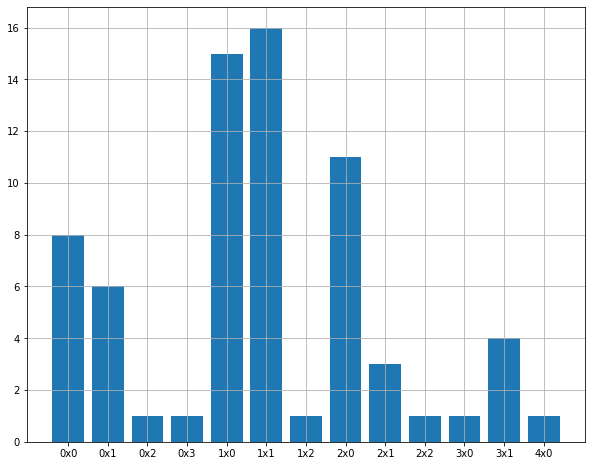

In [25]:
fig = plt.figure(figsize=(10,8))

ax = plt.bar(x=X, height=Y)

plt.grid(True)

In [26]:
X2, Y2 = np.unique(df_realizadas['Resultado Mandante'], return_counts=True)
X3, Y3 = np.unique(df_realizadas['Resultado Visitante'], return_counts=True)

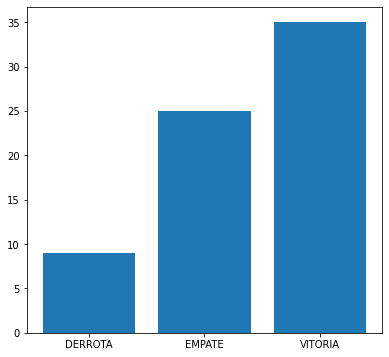

In [27]:
fig2 = plt.figure(figsize=(14, 6))

ax2 = fig2.add_subplot(1,2,1)
# ax3 = fig2.add_subplot(1,2,2)

ax2.bar(x=X2, height=Y2)
ax3 = ax

In [54]:
def GolsPro(equipe):
    gpc = df_realizadas[df_realizadas['Mandante'] == equipe]['Gols Mandante'].sum()
    gpf = df_realizadas[df_realizadas['Visitante'] == equipe]['Gols Visitante'].sum()
    return [gpc, gpf, gpc + gpf]

def GolsContra(equipe):
    gcc = df_realizadas[df_realizadas['Mandante'] == equipe]['Gols Visitante'].sum()
    gcf = df_realizadas[df_realizadas['Visitante'] == equipe]['Gols Mandante'].sum()
    return [gcc, gcf, gcc + gcf]

def NumJogos(equipe):
    jcasa = df_realizadas[(df_realizadas['Mandante'] == equipe)].shape[0]
    jfora = df_realizadas[df_realizadas['Visitante'] == equipe].shape[0]
    jtotal = jcasa + jfora
    return [jcasa, jfora, jtotal]

def MediaGolsPro(equipe):
    mgpc = round(GolsPro(equipe)[0]/NumJogos(equipe)[0], 3)
    mgpf = round(GolsPro(equipe)[1]/NumJogos(equipe)[1], 3)
    mgpt = round(GolsPro(equipe)[2]/NumJogos(equipe)[2], 3)
    return [mgpc, mgpf, mgpt]

def MediaGolsContra(equipe):
    mgcc = round(GolsContra(equipe)[0]/NumJogos(equipe)[0], 3)
    mgcf = round(GolsContra(equipe)[1]/NumJogos(equipe)[1], 3)
    mgct = round(GolsContra(equipe)[2]/NumJogos(equipe)[2], 3)
    return [mgcc, mgcf, mgct]

def NumVitorias(equipe):
    vit_casa = df_realizadas[(df_realizadas['Mandante'] == equipe) & (df_realizadas['Resultado Mandante'] == 'VITORIA')].shape[0]
    vit_fora = df_realizadas[(df_realizadas['Visitante'] == equipe) & (df_realizadas['Resultado Visitante'] == 'VITORIA')].shape[0]
    vit_total = vit_casa + vit_fora
    return [vit_casa, vit_fora, vit_total]

def NumDerrotas(equipe):
    der_casa = df_realizadas[(df_realizadas['Mandante'] == equipe) & (df_realizadas['Resultado Mandante'] == 'DERROTA')].shape[0]
    der_fora = df_realizadas[(df_realizadas['Visitante'] == equipe) & (df_realizadas['Resultado Visitante'] == 'DERROTA')].shape[0]
    der_total = der_casa + der_fora
    return [der_casa, der_fora, der_total]

def NumEmpates(equipe):
    emp_casa = df_realizadas[(df_realizadas['Mandante'] == equipe) & (df_realizadas['Resultado Mandante'] == 'EMPATE')].shape[0]
    emp_fora = df_realizadas[(df_realizadas['Visitante'] == equipe) & (df_realizadas['Resultado Visitante'] == 'EMPATE')].shape[0]
    emp_total = emp_casa + emp_fora
    return [emp_casa, emp_fora, emp_total]

def PontosEquipe(equipe):
    pt_casa = 3*NumVitorias(equipe)[0] + NumEmpates(equipe)[0]
    pt_fora = 3*NumVitorias(equipe)[1] + NumEmpates(equipe)[1]
    pt_total = 3*NumVitorias(equipe)[2] + NumEmpates(equipe)[2]
    return [pt_casa, pt_fora, pt_total]

def Aproveitamento(equipe):
    aprov_casa = round(PontosEquipe(equipe)[0]/(3*NumJogos(equipe)[0]), 3)
    aprov_fora = round(PontosEquipe(equipe)[1]/(3*NumJogos(equipe)[1]), 3)
    aprov_total = round(PontosEquipe(equipe)[2]/(3*NumJogos(equipe)[2]), 3)
    return [aprov_casa, aprov_fora, aprov_total]

In [55]:
DadosEquipes = []

for equipe in equipes:
    DadosEquipes.append([equipe, MediaGolsPro(equipe)[0], MediaGolsPro(equipe)[1], MediaGolsPro(equipe)[2],
                         MediaGolsContra(equipe)[0], MediaGolsContra(equipe)[1], MediaGolsContra(equipe)[2],
                        NumVitorias(equipe)[0], NumVitorias(equipe)[1], NumVitorias(equipe)[2],
                         NumEmpates(equipe)[0], NumEmpates(equipe)[1], NumEmpates(equipe)[2], 
                         NumDerrotas(equipe)[0], NumDerrotas(equipe)[1], NumDerrotas(equipe)[2],
                        PontosEquipe(equipe)[0], PontosEquipe(equipe)[1], PontosEquipe(equipe)[2],
                         Aproveitamento(equipe)[0], Aproveitamento(equipe)[1], Aproveitamento(equipe)[2]])
    

In [56]:
tabela = pd.DataFrame(DadosEquipes, columns=['Equipe', 'Média Gols Pró Casa',
                                             'Média Gols Pró Fora', 'Média Gols Pró Total',
                                            'Média Gols Contra Casa', 'Média Gols Contra Fora', 'Média Gols Contra Total',
                                             'Vitórias Casa', 'Vitórias Fora', 'Vitórias Total',
                                            'Empates Casa', 'Empates Fora', 'Empates Total',
                                             'Derrotas Casa', 'Derrotas Fora', 'Derrotas Total',
                                             'Pontos Casa', 'Pontos Fora', 'Pontos Total',
                                             'Aproveitamento Casa', 'Aproveitamento Fora', 'Aproveitamento Total'])

In [57]:
tabela

,Equipe,Média Gols Pró Casa,Média Gols Pró Fora,Média Gols Pró Total,Média Gols Contra Casa,Média Gols Contra Fora,Média Gols Contra Total,Vitórias Casa,Vitórias Fora,Vitórias Total,Empates Casa,Empates Fora,Empates Total,Derrotas Casa,Derrotas Fora,Derrotas Total,Pontos Casa,Pontos Fora,Pontos Total,Aproveitamento Casa,Aproveitamento Fora,Aproveitamento Total
0,BAHIA - BA,2.333,0.500,1.286,0.000,0.750,0.429,3,1,4,0,1,1,0,2,2,9,4,13,1.000,0.333,0.619
1,BRUSQUE - SC,1.000,0.500,0.714,0.000,2.000,1.143,2,0,2,1,0,1,0,4,4,7,0,7,0.778,0.000,0.333
2,CHAPECOENSE - SC,0.250,1.333,0.714,1.000,0.000,0.571,0,2,2,2,1,3,2,0,2,2,7,9,0.167,0.778,0.429
3,CRB - AL,1.333,0.250,0.714,1.333,2.250,1.857,1,0,1,1,0,1,1,4,5,4,0,4,0.444,0.000,0.190
4,CRICIUMA - SC,1.500,0.333,1.000,0.500,1.333,0.857,2,0,2,2,1,3,0,2,2,8,1,9,0.667,0.111,0.429
5,CRUZEIRO SAF - MG,1.000,1.000,1.000,0.000,0.750,0.429,3,2,5,0,1,1,0,1,1,9,7,16,1.000,0.583,0.762
6,CSA - AL,0.750,0.000,0.429,0.500,1.000,0.714,1,0,1,3,1,4,0,2,2,6,1,7,0.500,0.111,0.333
7,GREMIO - RS,1.667,0.333,1.000,0.667,0.333,0.500,2,1,3,0,1,1,1,1,2,6,4,10,0.667,0.444,0.556
8,GUARANI - SP,0.333,0.750,0.571,0.000,1.500,0.857,1,0,1,2,2,4,0,2,2,5,2,7,0.556,0.167,0.333
9,ITUANO - SP,1.333,0.667,1.000,0.333,1.333,0.833,2,0,2,1,1,2,0,2,2,7,1,8,0.778,0.111,0.444


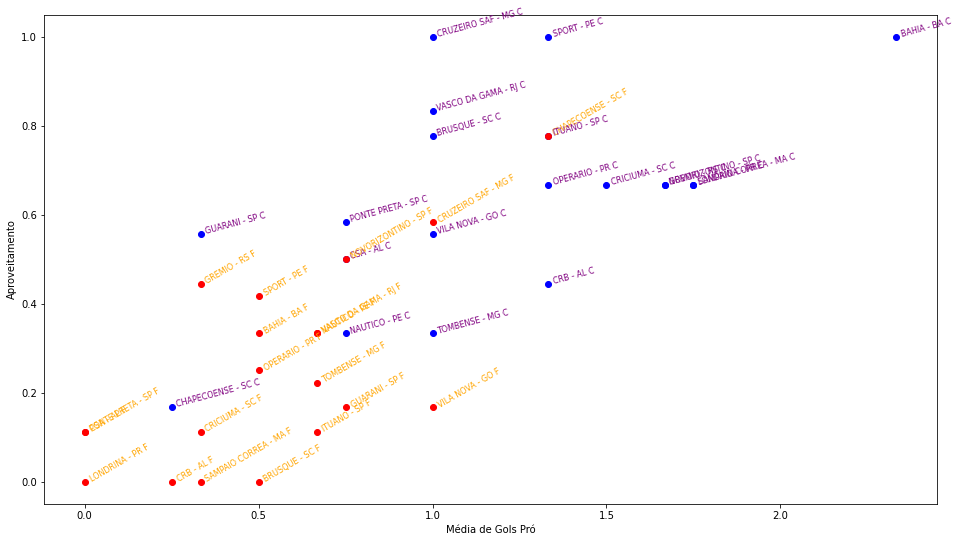

In [80]:
fig = plt.figure(figsize=(16,9))

ax1 = plt.scatter(x=tabela['Média Gols Pró Casa'], y=tabela['Aproveitamento Casa'], color = 'b')
ax2 = plt.scatter(x=tabela['Média Gols Pró Fora'], y=tabela['Aproveitamento Fora'], color = 'r')

plt.xlabel('Média de Gols Pró')
plt.ylabel('Aproveitamento')

x1=tabela['Média Gols Pró Casa']
y1=tabela['Aproveitamento Casa']

x2=tabela['Média Gols Pró Fora']
y2=tabela['Aproveitamento Fora']

for i in range(tabela.shape[0]):
    plt.annotate(tabela['Equipe'][i]+' '+'C', (x1[i]+.01, y1[i]), color='purple', fontsize=8, rotation=15)
    plt.annotate(tabela['Equipe'][i]+' '+'F', (x2[i]+.01, y2[i]), color='orange', fontsize=8, rotation=30)
    

In [34]:
df_realizadas[df_realizadas['Visitante'] == 'NOVORIZONTINO - SP']['Gols no Jogo'].value_counts()

2    2
0    1
1    1
Name: Gols no Jogo, dtype: int64